In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
plt.style.use('ggplot')

In [3]:
from sklearn.feature_extraction import dict_vectorizer

In [4]:
campaigns=pd.read_csv("assessment_challenge.csv",encoding='utf8')

In [5]:
campaigns.head()

,id,read_rate,from_domain_hash,Domain_extension,day,campaign_size,unique_user_cnt,avg_domain_read_rate,avg_domain_inbox_rate,avg_user_avg_read_rate,avg_user_domain_avg_read_rate,mb_superuser,mb_engper,mb_supersub,mb_engsec,mb_inper,mb_insec,mb_unengsec,mb_idlesub
0,1,0.142857,27b0d9f2946586e2714e3b4312bc8207,br,Sat,14,14,0.090180,0.104208,0.184311,0.205275,0.214286,0.428571,0.000000,0.000000,0,0.142857,0.214286,0
1,2,0.000000,b10a5c38ffad692959a42353fd2896f2,com,Wed,39,39,0.005406,0.008427,0.058590,0.000000,0.128205,0.102564,0.410256,0.153846,0,0.179487,0.025641,0
2,3,0.500000,f8a9fa3e4cbeb4436c4eaf9183df2cbf,com,Fri,18,2,0.302676,0.970434,0.055645,0.433333,0.000000,0.000000,0.500000,0.000000,0,0.000000,0.500000,0
3,4,0.134615,6dc9420f4bcb2746186f64cf5072d1fa,com,Sun,52,52,0.141473,0.776517,0.169429,0.182516,0.196078,0.215686,0.294118,0.176471,0,0.078431,0.039216,0
4,5,0.000000,a37f0e9827536a9bb709b1b505d57aa9,com,Sun,17,17,0.018936,0.028425,0.052422,0.000000,0.058824,0.294118,0.176471,0.176471,0,0.235294,0.058824,0


In [6]:
#Data Dimensions
campaigns.shape

(59976, 19)

In [7]:
#Count of distinct Domain Hash
campaigns['from_domain_hash'].unique().shape[0]

25481

In [8]:
pd.DataFrame(campaigns.groupby(['Domain_extension','day'])['read_rate'].mean()).sort_values(['read_rate'],ascending=False).head(30)

,,read_rate
Domain_extension,day,
lv,Tues,1.000000
email,Mon,1.000000
pk,Wed,1.000000
cu,Fri,1.000000
pg,Fri,1.000000
email,Thurs,0.972222
cu,Wed,0.875000
pk,Thurs,0.685897
mx,Thurs,0.540618


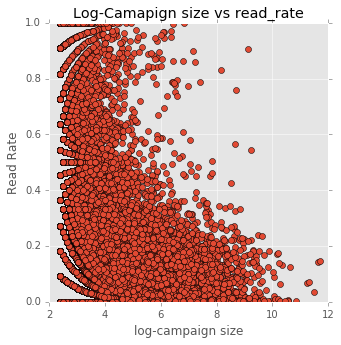

In [9]:
plt.figure(figsize=(5,5))
plt.plot(np.log(campaigns['campaign_size']),campaigns['read_rate'],'o')
plt.title("Log-Camapign size vs read_rate")
plt.xlabel("log-campaign size")
plt.ylabel("Read Rate")

In [10]:
campaigns.groupby(['day'])['read_rate'].mean().sort_values()

day
Sat      0.073478
Sun      0.074181
Mon      0.096753
Fri      0.097515
Thurs    0.102786
Wed      0.102799
Tues     0.105354
Name: read_rate, dtype: float64

In [11]:
campaigns.groupby(['day'])['day'].count().sort_values()

day
Sun      6840
Sat      7324
Thurs    8932
Mon      8934
Fri      9095
Tues     9283
Wed      9567
Name: day, dtype: int64

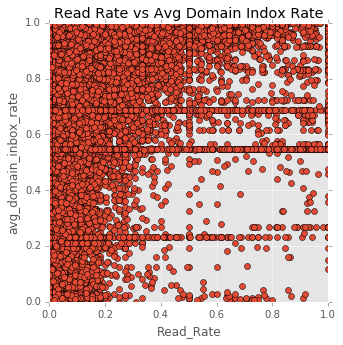

In [12]:
plt.figure(figsize=(5,5))
plt.plot(campaigns['read_rate'],campaigns['avg_domain_inbox_rate'],'o')
plt.title("Read Rate vs Avg Domain Indox Rate")
plt.xlabel("Read_Rate")
plt.ylabel("avg_domain_inbox_rate")

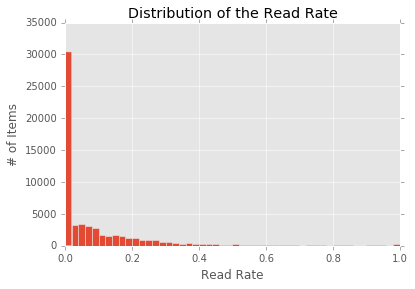

In [13]:
plt.title('Distribution of the Read Rate')
plt.xlabel('Read Rate')
plt.ylabel('# of Items')
plt.hist(campaigns['read_rate'],bins=50)
plt.show()


In [27]:
bins=np.histogram(campaigns['read_rate'],25)[1][:12]
print(bins)
bins=np.append(bins,[0.5,1.0])
campaigns['Discretized_Read_Rate']=np.digitize(campaigns['read_rate'],bins)

[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44]


In [15]:
campaigns.head()

,id,read_rate,from_domain_hash,Domain_extension,day,campaign_size,unique_user_cnt,avg_domain_read_rate,avg_domain_inbox_rate,avg_user_avg_read_rate,avg_user_domain_avg_read_rate,mb_superuser,mb_engper,mb_supersub,mb_engsec,mb_inper,mb_insec,mb_unengsec,mb_idlesub,Discretized_Read_Rate
0,1,0.142857,27b0d9f2946586e2714e3b4312bc8207,br,Sat,14,14,0.090180,0.104208,0.184311,0.205275,0.214286,0.428571,0.000000,0.000000,0,0.142857,0.214286,0,4
1,2,0.000000,b10a5c38ffad692959a42353fd2896f2,com,Wed,39,39,0.005406,0.008427,0.058590,0.000000,0.128205,0.102564,0.410256,0.153846,0,0.179487,0.025641,0,1
2,3,0.500000,f8a9fa3e4cbeb4436c4eaf9183df2cbf,com,Fri,18,2,0.302676,0.970434,0.055645,0.433333,0.000000,0.000000,0.500000,0.000000,0,0.000000,0.500000,0,13
3,4,0.134615,6dc9420f4bcb2746186f64cf5072d1fa,com,Sun,52,52,0.141473,0.776517,0.169429,0.182516,0.196078,0.215686,0.294118,0.176471,0,0.078431,0.039216,0,4
4,5,0.000000,a37f0e9827536a9bb709b1b505d57aa9,com,Sun,17,17,0.018936,0.028425,0.052422,0.000000,0.058824,0.294118,0.176471,0.176471,0,0.235294,0.058824,0,1


In [16]:
#Find the # of domain hashes
hash_counts=campaigns.groupby(['from_domain_hash'])['from_domain_hash'].count().sort_values(ascending=False)
hash_counts.head()

from_domain_hash
50cd1a9a183758039b0841aa738c3f0b    2461
f74d39fa044aa309eaea14b9f57fe79c    2152
d30663cb0bed60805ad3ae4ebbad217b    2148
636ae4d78ec2b46248fc59ac1ad737df    1665
f54db463750940e0e7f7630fe327845e     467
Name: from_domain_hash, dtype: int64

In [17]:
#Find the # of domain hashes > 50
campaigns_filtered=campaigns[campaigns['from_domain_hash'].isin(hash_counts[hash_counts > 50].index)]
campaigns_filtered.shape

(14406, 20)

In [18]:
def test_train_split_count(totalCount,splitFraction):
    """
    This function calculcate the actual # of rows to be on the test set based on the actual dataset.
    """
    return(math.ceil(totalCount*splitFraction))

In [19]:
def stratified_test_train_split(df,columnName,testTrainSplit):
    """
    Stratified Test Train Split Iterates through a category and samples a percent from that category to
    build a test dataset. This is better than random sampling because, this ensures the presence of
    an outcome both in test dataset and train dataset.
    Funtion Flow: This function finds unique labels of a class, slices the dataframe by that label,
    samples the proportion from that label, appends all the result and returns the final data.
    """
    uniqueLabels=list(np.unique(df[columnName]))
    firstLabel=uniqueLabels[0]
    fdf=df[df[columnName]==firstLabel]
    test_df=fdf.sample(test_train_split_count(fdf.shape[0],testTrainSplit))
    for label in uniqueLabels[1:]:
        fdf=df[df[columnName]==label]
        test_df=test_df.append(fdf.sample(test_train_split_count(fdf.shape[0],testTrainSplit)))
    return(test_df)

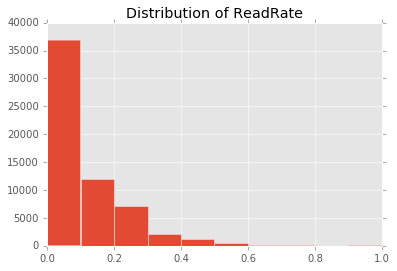

In [20]:
campaigns['avg_domain_read_rate'].hist()
plt.title("Distribution of ReadRate")

In [21]:
test_df=stratified_test_train_split(campaigns_filtered,'from_domain_hash',0.3)

In [22]:
train_df=campaigns_filtered[~campaigns_filtered['id'].isin(test_df['id'])]
train_df.shape

(10063, 20)

In [23]:
test_df.shape,train_df.shape

((4343, 20), (10063, 20))

In [24]:
test_df.to_csv("Test_split.csv")

In [25]:
train_df.to_csv("Train_split.csv")